# Data Fetching and train-test split

In [38]:
# from google.colab import drive
# drive.mount('/content/drive')

In [39]:
# pip install -q -U keras-tuner

In [50]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorboard.plugins.hparams import api as hp
import keras_tuner as kt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix
from scipy.spatial import distance
# import pathlib
# from os import getcwd

Training data is taken from Quora Questions Pairs dataset (training set only) https://www.kaggle.com/c/quora-question-pairs/overview translated to Indonesian with Google Translate

In [2]:
data1=pd.read_csv("D:/Documents/GitHub/bangkit-capstone0143/train complete indo.csv")

In [3]:
data1=data1.dropna()

In [43]:
data1.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,Apa panduan langkah demi langkah untuk berinve...,Apa panduan langkah demi langkah untuk berinve...,0
1,1,3,4,Bagaimana kisah Berlian Kohinoor (Koh-i-Noor)?,Apa yang akan terjadi jika pemerintah India me...,0
2,2,5,6,Bagaimana cara meningkatkan kecepatan koneksi ...,Bagaimana kecepatan Internet dapat ditingkatka...,0
3,3,7,8,Mengapa saya secara mental sangat kesepian? Ba...,Temukan sisanya ketika [math] 23 ^ {24} [/ mat...,0
4,4,9,10,Manakah yang larut dalam air seperti gula pasi...,Ikan apa yang akan bertahan hidup di air asin?,0


<AxesSubplot:>

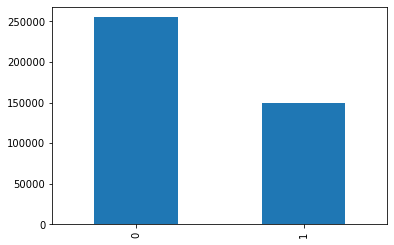

In [44]:
pd.value_counts(data1['is_duplicate']).plot.bar()

In [21]:
data1.question1.str.len().max()

717

In [22]:
data1.question2.str.len().max()

1395

Train-test split 90% 10%

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1[["question1", "question2"]], data1["is_duplicate"], test_size=0.1, random_state=42)

Transform the dataframe to NumPy array as TensorFlow takes NumPy arrays

In [5]:
xt=X_train.to_numpy()
yt=y_train.to_numpy()

xte=X_test.to_numpy()
yte=y_test.to_numpy()

Q1_train = X_train["question1"].to_numpy()
Q2_train = X_train["question2"].to_numpy()
Q1_test = X_test["question1"].to_numpy()
Q2_test = X_test["question2"].to_numpy()

In [25]:
Q1_train

array(['Apa sajakah proyek teknik mesin?',
       'Bagaimana Anda tahu jika dia tertarik pada Anda?',
       'Bisakah kita menemukan ketinggian ponsel dari tanah secara akurat.?\xa0â € ¦Jika tidak, bagaimana bisa mengatasinya.?',
       ..., 'Siapa yang saat ini memenangkan pemilihan presiden?',
       'Apa sajakah film Telugu / Tamil / Hindi yang pemeran utamanya menjadi mafia atau tidak?',
       'Berapa peringkat yang dipotong untuk perguruan tinggi Kedokteran Rohtak dalam kuota negara bagian?'],
      dtype=object)

In [26]:
data1["question1"][0]

'Apa panduan langkah demi langkah untuk berinvestasi di pasar saham di India?'

In [27]:
data1[["question1","question2"]]

,question1,question2
0,Apa panduan langkah demi langkah untuk berinve...,Apa panduan langkah demi langkah untuk berinve...
1,Bagaimana kisah Berlian Kohinoor (Koh-i-Noor)?,Apa yang akan terjadi jika pemerintah India me...
2,Bagaimana cara meningkatkan kecepatan koneksi ...,Bagaimana kecepatan Internet dapat ditingkatka...
3,Mengapa saya secara mental sangat kesepian? Ba...,Temukan sisanya ketika [math] 23 ^ {24} [/ mat...
4,Manakah yang larut dalam air seperti gula pasi...,Ikan apa yang akan bertahan hidup di air asin?
...,...,...
404285,Ada berapa kata kunci dalam bahasa pemrograman...,Ada berapa kata kunci dalam Bahasa Pemrograman...
404286,Apakah Anda percaya ada kehidupan setelah kema...,Benarkah ada kehidupan setelah kematian?
404287,Apa satu koin?,Koin apa ini?
404288,Berapa perkiraan biaya hidup tahunan selama be...,Saya mengalami sedikit masalah rambut rontok t...


In [6]:
embed=hub.KerasLayer(hub.load("C:/Users/stanl/Downloads/nnlm-id-dim128-norm"), input_shape=[], dtype=tf.string)

In [29]:
#Model runtime will increase if tranable=True to about 900-1000s per epoch
# embed = hub.KerasLayer("https://tfhub.dev/google/nnlm-id-dim128-with-normalization/2",input_shape=[], dtype=tf.string)
#embed.trainable=True

In [7]:
xt1=embed(Q1_train)
xt2=embed(Q2_train)
xte1=embed(Q1_test)
xte2=embed(Q2_test)

In [31]:
xt2

<tf.Tensor: shape=(363859, 128), dtype=float32, numpy=
array([[-0.053753  , -0.09628158, -0.06266727, ..., -0.03710537,
        -0.10238572,  0.02226824],
       [ 0.14299224,  0.18877506, -0.03349154, ..., -0.00806341,
        -0.07145633,  0.1015135 ],
       [ 0.05941568, -0.1906344 ,  0.18621024, ..., -0.088122  ,
        -0.22306792,  0.13632292],
       ...,
       [ 0.23911878, -0.14783452,  0.0107425 , ..., -0.0815316 ,
        -0.24931498,  0.05062477],
       [ 0.0373978 ,  0.03045387,  0.01306245, ..., -0.16649947,
        -0.04637462, -0.02678967],
       [ 0.01217015, -0.02358004,  0.0645157 , ..., -0.1297544 ,
        -0.13054067,  0.18736517]], dtype=float32)>

In [32]:
xt1

<tf.Tensor: shape=(363859, 128), dtype=float32, numpy=
array([[ 1.90162417e-02, -1.18593588e-01, -9.78335068e-02, ...,
         2.17009820e-02, -1.48417562e-01,  1.14940396e-02],
       [ 2.64445841e-01,  1.02562383e-01, -8.19351301e-02, ...,
         1.63417123e-02, -1.40222088e-01,  1.21525474e-01],
       [ 1.03515968e-01, -8.21223408e-02, -6.16349280e-06, ...,
        -2.67180860e-01, -1.27561107e-01,  1.11764565e-01],
       ...,
       [ 1.74064666e-01,  6.94696233e-02, -2.17809826e-02, ...,
        -5.72771169e-02, -1.78512469e-01, -6.91926526e-03],
       [ 1.42883718e-01, -1.64006665e-01,  3.34761925e-02, ...,
         4.38854322e-02, -1.28632009e-01, -2.39136852e-02],
       [-2.10693181e-02, -2.26702049e-01, -1.17028758e-01, ...,
        -1.37420133e-01, -1.14242919e-01,  8.96925703e-02]], dtype=float32)>

In [30]:
cos_sim_train=[]
cos_sim_test=[]
for i in range(len(xt1)):
    cos_sim_train.append(1-distance.cosine(xt1[i],xt2[i]))
for i in range(len(xte1)):
    cos_sim_test.append(1-distance.cosine(xte1[i],xte2[i]))


In [33]:
1-distance.cosine([1,0,0],[-1,0,0])

-1.0

In [61]:
cos_sim_train_round=[1 if x>=0 else 0 for x in cos_sim_train]
cos_sim_test_round=[1 if x>=0 else 0 for x in cos_sim_test]

In [62]:
print(len(cos_sim_train_round), sum(cos_sim_train_round))
print(len(yt),sum(yt))
print(len(cos_sim_test_round), sum(cos_sim_test_round))
print(len(yte),sum(yte))

363859 362759
363859 134222
40429 40313
40429 15041


In [63]:
confusion_matrix(yt,cos_sim_train_round)

array([[  1091, 228546],
       [     9, 134213]], dtype=int64)

In [64]:
confusion_matrix(yte,cos_sim_test_round)

array([[  116, 25272],
       [    0, 15041]], dtype=int64)

# Final Models
## Models with two inputs and embedding integrated

## Model with GRU layer

In [7]:
# Model with Bidirectional LSTM, GRU, without Attention, will run for about 150-200s per epoch
def model_builder(hp):
  hp_units1 = hp.Int('units_1', min_value=64, max_value=512, step=32)
  hp_units2 = hp.Int('units_2', min_value=64, max_value=512, step=32)
  hp_units3 = hp.Int('units_3', min_value=64, max_value=512, step=32)
  hp_units4 = hp.Int('units_4', min_value=64, max_value=512, step=32)
  hp_rate1 = hp.Float('dropout_1',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate2 = hp.Float('dropout_2',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate3 = hp.Float('dropout_3',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate4 = hp.Float('dropout_4',min_value=0.0,max_value=0.5,default=0.2,step=0.05)

  qstn1=tf.keras.Input(shape=(), dtype=tf.string)
  qstn2=tf.keras.Input(shape=(), dtype=tf.string)

  qu1=embed(qstn1)
  qu2=embed(qstn2)
  concat=tf.keras.layers.concatenate([qu1,qu2])
  concat=tf.keras.layers.Reshape((2,128))(concat)
  concat=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(concat)
  concat=tf.keras.layers.GRU(64, return_sequences=True)(concat)
  concat=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32))(concat)
  concat=tf.keras.layers.Dense(units=hp_units1,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate1)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units2,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate2)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units3,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate3)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units4,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate4)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  is_dupe=tf.keras.layers.Dense(1, activation="sigmoid")(concat)

  model = tf.keras.models.Model(inputs=[qstn1,qstn2], outputs=is_dupe)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [34]:
def model_builder_1(hp):
  hp_units1 = hp.Int('units_1', min_value=64, max_value=512, step=32)
  hp_units2 = hp.Int('units_2', min_value=64, max_value=512, step=32)
  hp_units3 = hp.Int('units_3', min_value=64, max_value=512, step=32)
  hp_units4 = hp.Int('units_4', min_value=64, max_value=512, step=32)
  hp_rate1 = hp.Float('dropout_1',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate2 = hp.Float('dropout_2',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate3 = hp.Float('dropout_3',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate4 = hp.Float('dropout_4',min_value=0.0,max_value=0.5,default=0.2,step=0.05)

  qstn1=tf.keras.Input(shape=(), dtype=tf.string)
  qstn2=tf.keras.Input(shape=(), dtype=tf.string)

  qu1=embed(qstn1)
  qu2=embed(qstn2)
  concat=tf.keras.layers.concatenate([qu1,qu2])
  concat=tf.keras.layers.Reshape((2,128))(concat)
  concat=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(concat)
  concat=tf.keras.layers.GRU(64, return_sequences=True)(concat)
  concat=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(concat)
  concat=tf.keras.layers.Dense(units=hp_units1,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate1)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units2,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate2)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units3,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate3)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units4,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate4)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  is_dupe=tf.keras.layers.Dense(1, activation="sigmoid")(concat)

  model = tf.keras.models.Model(inputs=[qstn1,qstn2], outputs=is_dupe)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [48]:
def model_builder_2(hp):
  hp_units_L1 = hp.Choice('units_L1',values=[32, 64, 128], default=64)
  hp_units_L2= hp.Choice('units_L2',values=[32, 64, 128], default=64)
  hp_units_L3 = hp.Choice('units_L3',values=[32, 64, 128], default=32)
  hp_units1 = hp.Int('units_1', min_value=64, max_value=512, step=32)
  hp_units2 = hp.Int('units_2', min_value=64, max_value=512, step=32)
  hp_units3 = hp.Int('units_3', min_value=64, max_value=512, step=32)
  hp_units4 = hp.Int('units_4', min_value=64, max_value=512, step=32)
  hp_rate1 = hp.Float('dropout_1',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate2 = hp.Float('dropout_2',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate3 = hp.Float('dropout_3',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate4 = hp.Float('dropout_4',min_value=0.0,max_value=0.5,default=0.2,step=0.05)

  qstn1=tf.keras.Input(shape=(), dtype=tf.string)
  qstn2=tf.keras.Input(shape=(), dtype=tf.string)

  qu1=embed(qstn1)
  qu2=embed(qstn2)
  concat=tf.keras.layers.concatenate([qu1,qu2])
  concat=tf.keras.layers.Reshape((2,128))(concat)
  concat=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=hp_units_L1, return_sequences=True))(concat)
  concat=tf.keras.layers.GRU(units=hp_units_L2, return_sequences=True)(concat)
  concat=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=hp_units_L3))(concat)
  concat=tf.keras.layers.Dense(units=hp_units1,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate1)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units2,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate2)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units3,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate3)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units4,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate4)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  is_dupe=tf.keras.layers.Dense(1, activation="sigmoid")(concat)

  model = tf.keras.models.Model(inputs=[qstn1,qstn2], outputs=is_dupe)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

## Model with reduced layers

In [7]:
# Model with Bidirectional LSTM, GRU, without Attention, will run for about 150-200s per epoch
def model_builder2(hp):
  hp_units_L1 = hp.Choice('units_L1',values=[32, 64, 128], default=64)
  hp_units_L2= hp.Choice('units_L2',values=[32, 64, 128], default=64)
  hp_units_L3 = hp.Choice('units_L3',values=[32, 64, 128], default=32)
  hp_units1 = hp.Int('units_1', min_value=32, max_value=512, step=32)
  hp_units2 = hp.Int('units_2', min_value=32, max_value=512, step=32)
  hp_units3 = hp.Int('units_3', min_value=32, max_value=512, step=32)
  hp_rate1 = hp.Float('dropout_1',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate2 = hp.Float('dropout_2',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate3 = hp.Float('dropout_3',min_value=0.0,max_value=0.5,default=0.2,step=0.05)

  qstn1=tf.keras.Input(shape=(), dtype=tf.string)
  qstn2=tf.keras.Input(shape=(), dtype=tf.string)

  qu1=embed(qstn1)
  qu2=embed(qstn2)
  concat=tf.keras.layers.concatenate([qu1,qu2])
  concat=tf.keras.layers.Reshape((2,128))(concat)
  concat=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=hp_units_L1, return_sequences=True))(concat)
  concat=tf.keras.layers.GRU(units=hp_units_L2, return_sequences=True)(concat)
  concat=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=hp_units_L3))(concat)
  concat=tf.keras.layers.Dense(units=hp_units1,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate1)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units2,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate2)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units3,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate3)(concat)
  is_dupe=tf.keras.layers.Dense(1, activation="sigmoid")(concat)

  model = tf.keras.models.Model(inputs=[qstn1,qstn2], outputs=is_dupe)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [1]:
def model_builder5(hp):
  hp_units_L1 = hp.Choice('units_L1',values=[32, 64, 128], default=64)
  hp_units_L2= hp.Choice('units_L2',values=[32, 64, 128], default=64)
  hp_units1 = hp.Int('units_1', min_value=64, max_value=512, step=32)
  hp_units2 = hp.Int('units_2', min_value=64, max_value=512, step=32)
  hp_units3 = hp.Int('units_3', min_value=64, max_value=512, step=32)
  hp_units4 = hp.Int('units_4', min_value=64, max_value=512, step=32)
  hp_rate1 = hp.Float('dropout_1',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate2 = hp.Float('dropout_2',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate3 = hp.Float('dropout_3',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate4 = hp.Float('dropout_4',min_value=0.0,max_value=0.5,default=0.2,step=0.05)

  qstn1=tf.keras.Input(shape=(), dtype=tf.string)
  qstn2=tf.keras.Input(shape=(), dtype=tf.string)

  qu1=embed(qstn1)
  qu2=embed(qstn2)
  concat=tf.keras.layers.concatenate([qu1,qu2])
  concat=tf.keras.layers.Reshape((2,128))(concat)
  concat=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=hp_units_L1, return_sequences=True))(concat)
  concat=tf.keras.layers.GRU(units=hp_units_L2)(concat)
  concat=tf.keras.layers.Dense(units=hp_units1,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate1)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units2,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate2)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units3,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate3)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units4,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate4)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  is_dupe=tf.keras.layers.Dense(1, activation="sigmoid")(concat)

  model = tf.keras.models.Model(inputs=[qstn1,qstn2], outputs=is_dupe)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

## Model without GRU layer

In [27]:
def model_builder3(hp):
  hp_units_L1 = hp.Choice('units_L1',values=[32, 64, 128], default=64)
  hp_units1 = hp.Int('units_1', min_value=64, max_value=512, step=32)
  hp_units2 = hp.Int('units_2', min_value=64, max_value=512, step=32)
  hp_units3 = hp.Int('units_3', min_value=64, max_value=512, step=32)
  hp_units4 = hp.Int('units_4', min_value=64, max_value=512, step=32)
  hp_rate1 = hp.Float('dropout_1',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate2 = hp.Float('dropout_2',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate3 = hp.Float('dropout_3',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate4 = hp.Float('dropout_4',min_value=0.0,max_value=0.5,default=0.2,step=0.05)

  qstn1=tf.keras.Input(shape=(), dtype=tf.string)
  qstn2=tf.keras.Input(shape=(), dtype=tf.string)

  qu1=embed(qstn1)
  qu2=embed(qstn2)
  concat=tf.keras.layers.concatenate([qu1,qu2])
  concat=tf.keras.layers.Reshape((2,128))(concat)
  concat=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=hp_units_L1))(concat)
  concat=tf.keras.layers.Dense(units=hp_units1,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate1)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units2,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate2)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units3,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate3)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units4,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate4)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  is_dupe=tf.keras.layers.Dense(1, activation="sigmoid")(concat)

  model = tf.keras.models.Model(inputs=[qstn1,qstn2], outputs=is_dupe)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [28]:
def model_builder4(hp):
  hp_units_L1 = hp.Choice('units_L1',values=[32, 64, 128], default=64)
  hp_units_L2= hp.Choice('units_L2',values=[32, 64, 128], default=64)
  hp_units1 = hp.Int('units_1', min_value=64, max_value=512, step=32)
  hp_units2 = hp.Int('units_2', min_value=64, max_value=512, step=32)
  hp_units3 = hp.Int('units_3', min_value=64, max_value=512, step=32)
  hp_units4 = hp.Int('units_4', min_value=64, max_value=512, step=32)
  hp_rate1 = hp.Float('dropout_1',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate2 = hp.Float('dropout_2',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate3 = hp.Float('dropout_3',min_value=0.0,max_value=0.5,default=0.2,step=0.05)
  hp_rate4 = hp.Float('dropout_4',min_value=0.0,max_value=0.5,default=0.2,step=0.05)

  qstn1=tf.keras.Input(shape=(), dtype=tf.string)
  qstn2=tf.keras.Input(shape=(), dtype=tf.string)

  qu1=embed(qstn1)
  qu2=embed(qstn2)
  concat=tf.keras.layers.concatenate([qu1,qu2])
  concat=tf.keras.layers.Reshape((2,128))(concat)
  concat=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=hp_units_L1, return_sequences=True))(concat)
  concat=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=hp_units_L2))(concat)
  concat=tf.keras.layers.Dense(units=hp_units1,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate1)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units2,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate2)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units3,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate3)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  concat=tf.keras.layers.Dense(units=hp_units4,activation='relu')(concat)
  concat=tf.keras.layers.Dropout(rate=hp_rate4)(concat)
  concat=tf.keras.layers.BatchNormalization()(concat)
  is_dupe=tf.keras.layers.Dense(1, activation="sigmoid")(concat)

  model = tf.keras.models.Model(inputs=[qstn1,qstn2], outputs=is_dupe)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

## Hyperparameter Tuning

In [9]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

In [74]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=8,
                     factor=3,
                     directory='C:/Users/stanl/Documents/keras_tuner_checkpoints',
                     overwrite=False,
                     project_name='model_gru1')

In [47]:
tuner_1 = kt.Hyperband(model_builder_1,
                     objective='val_accuracy',
                     max_epochs=8,
                     factor=3,
                     directory='C:/Users/stanl/Documents/keras_tuner_checkpoints',
                     overwrite=False,
                     project_name='model_gru_1')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [49]:
tuner_2 = kt.Hyperband(model_builder_2,
                     objective='val_accuracy',
                     max_epochs=8,
                     factor=3,
                     directory='C:/Users/stanl/Documents/keras_tuner_checkpoints',
                     overwrite=False,
                     project_name='model_gru_2')

In [8]:
tuner2 = kt.Hyperband(model_builder2,
                     objective='val_accuracy',
                     max_epochs=8,
                     factor=3,
                     directory='C:/Users/stanl/Documents/keras_tuner_checkpoints',
                     overwrite=False,
                     project_name='model_gru_red')

INFO:tensorflow:Reloading Oracle from existing project C:/Users/stanl/Documents/keras_tuner_checkpoints\model_gru_red\oracle.json
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Reloading Tuner from C:/Users/stanl/Documents/keras_tuner_checkpoints\model_gru_red\tuner0.json


In [29]:
tuner3 = kt.Hyperband(model_builder3,
                     objective='val_accuracy',
                     max_epochs=8,
                     factor=3,
                     directory='C:/Users/stanl/Documents/keras_tuner_checkpoints',
                     overwrite=False,
                     project_name='model_bilstm_red')

INFO:tensorflow:Reloading Oracle from existing project C:/Users/stanl/Documents/keras_tuner_checkpoints\model_bilstm_red\oracle.json
INFO:tensorflow:Reloading Tuner from C:/Users/stanl/Documents/keras_tuner_checkpoints\model_bilstm_red\tuner0.json


In [30]:
tuner4 = kt.Hyperband(model_builder4,
                     objective='val_accuracy',
                     max_epochs=8,
                     factor=3,
                     directory='C:/Users/stanl/Documents/keras_tuner_checkpoints',
                     overwrite=False,
                     project_name='model_bilstm_1')

INFO:tensorflow:Reloading Oracle from existing project C:/Users/stanl/Documents/keras_tuner_checkpoints\model_bilstm_1\oracle.json
INFO:tensorflow:Reloading Tuner from C:/Users/stanl/Documents/keras_tuner_checkpoints\model_bilstm_1\tuner0.json


In [10]:
tuner5 = kt.Hyperband(model_builder5,
                     objective='val_accuracy',
                     max_epochs=8,
                     factor=3,
                     directory='C:/Users/stanl/Documents/keras_tuner_checkpoints',
                     overwrite=False,
                     project_name='model_gru_0')

INFO:tensorflow:Reloading Oracle from existing project C:/Users/stanl/Documents/keras_tuner_checkpoints\model_gru_0\oracle.json
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Reloading Tuner from C:/Users/stanl/Documents/keras_tuner_checkpoints\model_gru_0\tuner0.json


In [75]:
tuner.search([Q1_train, Q2_train], yt, epochs=8, validation_split=0.1, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the densely-connected
layer are {best_hps.get('units_1')}, {best_hps.get('units_2')}, {best_hps.get('units_3')}, {best_hps.get('units_4')} and the optimal droupout rate for the optimizer
is {best_hps.get('dropout_1')}, {best_hps.get('dropout_2')}, {best_hps.get('dropout_3')}, {best_hps.get('dropout_4')}.
""")

Trial 10 Complete [00h 10m 54s]
val_accuracy: 0.7952508926391602

Best val_accuracy So Far: 0.7984389662742615
Total elapsed time: 01h 11m 52s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the densely-connected
layer are 128, 128, 384, 480 and the optimal droupout rate for the optimizer
is 0.25, 0.2, 0.05, 0.25.



In [50]:
tuner_1.search([Q1_train, Q2_train], yt, epochs=8, validation_split=0.1, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps_1=tuner_1.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the densely-connected
layer are {best_hps_1.get('units_1')}, {best_hps_1.get('units_2')}, {best_hps_1.get('units_3')}, {best_hps_1.get('units_4')} and the optimal droupout rate for the optimizer
is {best_hps_1.get('dropout_1')}, {best_hps_1.get('dropout_2')}, {best_hps_1.get('dropout_3')}, {best_hps_1.get('dropout_4')}.
""")

Trial 10 Complete [00h 18m 01s]
val_accuracy: 0.8011048436164856

Best val_accuracy So Far: 0.8011048436164856
Total elapsed time: 01h 31m 00s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the densely-connected
layer are 480, 480, 128, 288 and the optimal droupout rate for the optimizer
is 0.0, 0.5, 0.25, 0.2.



In [80]:
tuner_2.search([Q1_train, Q2_train], yt, epochs=8, validation_split=0.1, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps_2=tuner_2.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the RNN layers are 
{best_hps_2.get('units_L1')}, {best_hps_2.get('units_L2')}, {best_hps_2.get('units_L3')}, the densely-connected
layers are {best_hps_2.get('units_1')}, {best_hps_2.get('units_2')}, {best_hps_2.get('units_3')}, {best_hps_2.get('units_4')} and the optimal droupout rate for the optimizer
is {best_hps_2.get('dropout_1')}, {best_hps_2.get('dropout_2')}, {best_hps_2.get('dropout_3')}, {best_hps_2.get('dropout_4')}.
""")

Trial 10 Complete [00h 10m 05s]
val_accuracy: 0.7849997282028198

Best val_accuracy So Far: 0.8016819953918457
Total elapsed time: 01h 44m 20s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the RNN layers are 
128, 64, 128, the densely-connected
layers are 512, 224, 160, 224 and the optimal droupout rate for the optimizer
is 0.45, 0.2, 0.25, 0.4.



In [14]:
tuner2.search([Q1_train, Q2_train], yt, epochs=8, validation_split=0.1, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps2=tuner2.get_best_hyperparameters(num_trials=1)[0]

Trial 3 Complete [00h 04m 14s]
val_accuracy: 0.7827185988426208

Best val_accuracy So Far: 0.7913758158683777
Total elapsed time: 00h 13m 48s
INFO:tensorflow:Oracle triggered exit


In [16]:
print(f"""
The hyperparameter search is complete. The optimal number of units in the RNN layers are 
{best_hps2.get('units_L1')}, {best_hps2.get('units_L2')}, {best_hps2.get('units_L3')}, the densely-connected
layers are {best_hps2.get('units_1')}, {best_hps2.get('units_2')}, {best_hps2.get('units_3')} and the optimal droupout rates 
are {best_hps2.get('dropout_1')}, {best_hps2.get('dropout_2')}, {best_hps2.get('dropout_3')}.
""")


The hyperparameter search is complete. The optimal number of units in the RNN layers are 
128, 128, 64, the densely-connected
layers are 448, 256, 256 and the optimal droupout rates 
are 0.35000000000000003, 0.45, 0.30000000000000004.



In [32]:
tuner3.search([Q1_train, Q2_train], yt, epochs=8, validation_split=0.1, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps3=tuner3.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the RNN layer is 
{best_hps3.get('units_L1')} the densely-connected
layers are {best_hps3.get('units_1')}, {best_hps3.get('units_2')}, {best_hps3.get('units_3')}, {best_hps3.get('units_4')} and the optimal droupout rates 
are {best_hps3.get('dropout_1')}, {best_hps3.get('dropout_2')}, {best_hps3.get('dropout_3')}, {best_hps3.get('dropout_4')}.
""")

Trial 3 Complete [00h 04m 08s]
val_accuracy: 0.7767822742462158

Best val_accuracy So Far: 0.7884900569915771
Total elapsed time: 00h 12m 48s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the RNN layer is 
64 the densely-connected
layers are 160, 192, 192, 192 and the optimal droupout rates 
are 0.2, 0.2, 0.2, 0.4.



In [34]:
tuner4.search([Q1_train, Q2_train], yt, epochs=8, validation_split=0.1, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps4=tuner4.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the RNN layers are 
{best_hps4.get('units_L1')},  {best_hps4.get('units_L2')} the densely-connected
layers are {best_hps4.get('units_1')}, {best_hps4.get('units_2')}, {best_hps4.get('units_3')}, {best_hps4.get('units_4')} and the optimal droupout rates 
are {best_hps4.get('dropout_1')}, {best_hps4.get('dropout_2')}, {best_hps4.get('dropout_3')}, {best_hps4.get('dropout_4')}.
""")

Trial 3 Complete [00h 06m 00s]
val_accuracy: 0.7782663702964783

Best val_accuracy So Far: 0.789369523525238
Total elapsed time: 00h 19m 33s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the RNN layers are 
128,  32 the densely-connected
layers are 416, 384, 192, 480 and the optimal droupout rates 
are 0.2, 0.0, 0.05, 0.45.



In [12]:
tuner5.search([Q1_train, Q2_train], yt, epochs=8, validation_split=0.1, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps5=tuner5.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the RNN layers are 
{best_hps5.get('units_L1')},  {best_hps5.get('units_L2')} the densely-connected
layers are {best_hps5.get('units_1')}, {best_hps5.get('units_2')}, {best_hps5.get('units_3')}, {best_hps5.get('units_4')} and the optimal droupout rates 
are {best_hps5.get('dropout_1')}, {best_hps5.get('dropout_2')}, {best_hps5.get('dropout_3')}, {best_hps5.get('dropout_4')}.
""")

Trial 3 Complete [00h 05m 08s]
val_accuracy: 0.7833782434463501

Best val_accuracy So Far: 0.7966250777244568
Total elapsed time: 00h 14m 24s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the RNN layers are 
128,  128 the densely-connected
layers are 320, 160, 96, 384 and the optimal droupout rates 
are 0.0, 0.05, 0.05, 0.45.



## Models after tuned

In [76]:
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        (None, 128)          112461824   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 256)          0           keras_layer[44][0]    

In [25]:
# history = best_model.fit([Q1_train, Q2_train],yt, epochs=3, validation_split=0.1)

Epoch 1/3
10234/10234 [==============================] - 71s 7ms/step - loss: 0.4211 - accuracy: 0.7984 - val_loss: 0.4571 - val_accuracy: 0.7803
Epoch 2/3
10234/10234 [==============================] - 74s 7ms/step - loss: 0.4084 - accuracy: 0.8061 - val_loss: 0.4307 - val_accuracy: 0.7909
Epoch 3/3
10234/10234 [==============================] - 74s 7ms/step - loss: 0.3986 - accuracy: 0.8129 - val_loss: 0.4470 - val_accuracy: 0.7872


In [51]:
best_model_1 = tuner_1.get_best_models()[0]
best_model_1.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      (None, 128)          112461824   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 256)          0           keras_layer_1[24][0]  

In [81]:
best_model_2 = tuner_2.get_best_models()[0]
best_model_2.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      (None, 128)          112461824   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 256)          0           keras_layer_1[46][0]  

In [17]:
best_model2 = tuner2.get_best_models()[0]
best_model2.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        (None, 128)          112461824   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 256)          0           keras_layer[8][0]     

In [36]:
best_model3 = tuner3.get_best_models()[0]
best_model3.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        (None, 128)          112461824   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 256)          0           keras_layer[26][0]    

In [37]:
best_model4 = tuner4.get_best_models()[0]
best_model4.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        (None, 128)          112461824   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 256)          0           keras_layer[28][0]    

In [13]:
best_model5 = tuner5.get_best_models()[0]
best_model5.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        (None, 128)          112461824   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 256)          0           keras_layer[8][0]     

## Evaluation

### Test set evaluation

In [77]:
eval_result = best_model.evaluate([Q1_test,Q2_test], yte)
print("[test loss, test accuracy]:", eval_result)

1264/1264 [==============================] - 3s 3ms/step - loss: 0.4265 - accuracy: 0.7953
[test loss, test accuracy]: [0.4264649748802185, 0.7953449487686157]


In [52]:
eval_result = best_model_1.evaluate([Q1_test,Q2_test], yte)
print("[test loss, test accuracy]:", eval_result)

1264/1264 [==============================] - 5s 4ms/step - loss: 0.4171 - accuracy: 0.8009
[test loss, test accuracy]: [0.4171454608440399, 0.8008854985237122]


In [82]:
eval_result = best_model_2.evaluate([Q1_test,Q2_test], yte)
print("[test loss, test accuracy]:", eval_result)

1264/1264 [==============================] - 9s 7ms/step - loss: 0.4205 - accuracy: 0.8023
[test loss, test accuracy]: [0.4205167293548584, 0.8022953867912292]


In [15]:
tf.keras.utils.plot_model(best_model2, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
# history = best_model.fit([Q1_train, Q2_train],yt, epochs=10, validation_split=0.2)

Epoch 1/10
8086/8086 [==============================] - 244s 28ms/step - loss: 0.4806 - accuracy: 0.7601 - val_loss: 0.4638 - val_accuracy: 0.7668
Epoch 2/10
8086/8086 [==============================] - 222s 27ms/step - loss: 0.4609 - accuracy: 0.7728 - val_loss: 0.4541 - val_accuracy: 0.7744
Epoch 3/10
8086/8086 [==============================] - 224s 28ms/step - loss: 0.4452 - accuracy: 0.7828 - val_loss: 0.4492 - val_accuracy: 0.7796
Epoch 4/10
8086/8086 [==============================] - 219s 27ms/step - loss: 0.4329 - accuracy: 0.7908 - val_loss: 0.4411 - val_accuracy: 0.7833
Epoch 5/10
8086/8086 [==============================] - 221s 27ms/step - loss: 0.4200 - accuracy: 0.7986 - val_loss: 0.4393 - val_accuracy: 0.7830
Epoch 6/10
8086/8086 [==============================] - 224s 28ms/step - loss: 0.4095 - accuracy: 0.8051 - val_loss: 0.4361 - val_accuracy: 0.7875
Epoch 7/10
8086/8086 [==============================] - 218s 27ms/step - loss: 0.4000 - accuracy: 0.8107 - val_loss: 0

In [55]:
history2 = best_model2.fit([Q1_train, Q2_train],yt, epochs=1, validation_split=0.1)

10234/10234 [==============================] - 94s 9ms/step - loss: 0.3586 - accuracy: 0.8331 - val_loss: 0.4226 - val_accuracy: 0.8001


In [18]:
eval_result = best_model2.evaluate([Q1_test,Q2_test], yte)
print("[test loss, test accuracy]:", eval_result)

1264/1264 [==============================] - 4s 3ms/step - loss: 0.4313 - accuracy: 0.7916
[test loss, test accuracy]: [0.43130362033843994, 0.7915605306625366]


In [38]:
eval_result = best_model3.evaluate([Q1_test,Q2_test], yte)
print("[test loss, test accuracy]:", eval_result)

1264/1264 [==============================] - 2s 2ms/step - loss: 0.4357 - accuracy: 0.7893
[test loss, test accuracy]: [0.435689777135849, 0.7893096804618835]


In [39]:
eval_result = best_model4.evaluate([Q1_test,Q2_test], yte)
print("[test loss, test accuracy]:", eval_result)

1264/1264 [==============================] - 4s 3ms/step - loss: 0.4325 - accuracy: 0.7905
[test loss, test accuracy]: [0.4324806034564972, 0.7904722094535828]


In [14]:
eval_result = best_model5.evaluate([Q1_test,Q2_test], yte)
print("[test loss, test accuracy]:", eval_result)

1264/1264 [==============================] - 3s 3ms/step - loss: 0.4286 - accuracy: 0.7947
[test loss, test accuracy]: [0.42862510681152344, 0.7946523427963257]


### Self test 1

In [43]:
1-distance.cosine(embed(["saya memukul kursi"]),embed(["kursi dipukul oleh saya"]))

0.7853306531906128

In [78]:
best_model.predict([np.asarray(["saya memukul kursi"]),np.asarray(["kursi dipukul oleh saya"])])

array([[0.90738606]], dtype=float32)

In [53]:
best_model_1.predict([np.asarray(["saya memukul kursi"]),np.asarray(["kursi dipukul oleh saya"])])

array([[0.86217105]], dtype=float32)

In [83]:
best_model_2.predict([np.asarray(["saya memukul kursi"]),np.asarray(["kursi dipukul oleh saya"])])

array([[0.9655088]], dtype=float32)

In [19]:
prediction4 = best_model2.predict([np.asarray(["saya memukul kursi"]),np.asarray(["kursi dipukul oleh saya"])])
print(prediction4)

[[0.7261495]]


In [40]:
best_model3.predict([np.asarray(["saya memukul kursi"]),np.asarray(["kursi dipukul oleh saya"])])

array([[0.6132752]], dtype=float32)

In [41]:
best_model4.predict([np.asarray(["saya memukul kursi"]),np.asarray(["kursi dipukul oleh saya"])])

array([[0.64983207]], dtype=float32)

In [15]:
best_model5.predict([np.asarray(["saya memukul kursi"]),np.asarray(["kursi dipukul oleh saya"])])

array([[0.95816815]], dtype=float32)

### Self Test 2

In [44]:
1-distance.cosine(embed(["saya yang mempunyai gitar yamaha itu"]),embed(["gitar yamaha itu milik saya"]))

0.8023244142532349

In [79]:
best_model.predict([np.asarray(["saya yang mempunyai gitar yamaha itu"]),np.asarray(["gitar yamaha itu milik saya"])])

array([[0.72099113]], dtype=float32)

In [60]:
best_model_1.predict([np.asarray(["saya yang mempunyai gitar yamaha itu"]),np.asarray(["gitar yamaha itu milik saya"])])

array([[0.9426672]], dtype=float32)

In [91]:
best_model_2.predict([np.asarray(["saya yang mempunyai gitar yamaha itu"]),np.asarray(["gitar yamaha itu milik saya"])])

array([[0.9065684]], dtype=float32)

In [20]:
best_model2.predict([np.asarray(["saya yang mempunyai gitar yamaha itu"]),np.asarray(["gitar yamaha itu milik saya"])])

array([[0.4392359]], dtype=float32)

In [45]:
best_model3.predict([np.asarray(["saya yang mempunyai gitar yamaha itu"]),np.asarray(["gitar yamaha itu milik saya"])])

array([[0.8209579]], dtype=float32)

In [43]:
best_model4.predict([np.asarray(["saya yang mempunyai gitar yamaha itu"]),np.asarray(["gitar yamaha itu milik saya"])])

array([[0.59671557]], dtype=float32)

In [18]:
best_model5.predict([np.asarray(["saya yang mempunyai gitar yamaha itu"]),np.asarray(["gitar yamaha itu milik saya"])])

array([[0.96405613]], dtype=float32)

### Self Test 3

In [45]:
1-distance.cosine(embed(["saya bermain di atas meja"]),embed(["kursi diduduki oleh saya"]))

0.3774293065071106

In [80]:
best_model.predict([np.asarray(["saya bermain di atas meja"]),np.asarray(["kursi diduduki oleh saya"])])

array([[0.00692433]], dtype=float32)

In [61]:
best_model_1.predict([np.asarray(["saya bermain di atas meja"]),np.asarray(["kursi diduduki oleh saya"])])

array([[0.01993454]], dtype=float32)

In [92]:
best_model_2.predict([np.asarray(["saya bermain di atas meja"]),np.asarray(["kursi diduduki oleh saya"])])

array([[0.03581345]], dtype=float32)

In [21]:
best_model2.predict([np.asarray(["saya bermain di atas meja"]),np.asarray(["kursi diduduki oleh saya"])])

array([[0.00196424]], dtype=float32)

In [46]:
best_model3.predict([np.asarray(["saya bermain di atas meja"]),np.asarray(["kursi diduduki oleh saya"])])

array([[0.01750085]], dtype=float32)

In [47]:
best_model4.predict([np.asarray(["saya bermain di atas meja"]),np.asarray(["kursi diduduki oleh saya"])])

array([[0.01199508]], dtype=float32)

In [19]:
best_model5.predict([np.asarray(["saya bermain di atas meja"]),np.asarray(["kursi diduduki oleh saya"])])

array([[0.09819081]], dtype=float32)

### Self Test 4

In [46]:
1-distance.cosine(embed(["dia gemar berbohong"]),embed(["dia suka berdusta"]))

0.8526097536087036

In [81]:
best_model.predict([np.asarray(["dia gemar berbohong"]),np.asarray(["dia suka berdusta"])])

array([[0.749652]], dtype=float32)

In [70]:
best_model_1.predict([np.asarray(["dia gemar berbohong"]),np.asarray(["dia suka berdusta"])])

array([[0.906271]], dtype=float32)

In [96]:
best_model_2.predict([np.asarray(["dia gemar berbohong"]),np.asarray(["dia suka berdusta"])])

array([[0.7788778]], dtype=float32)

In [22]:
best_model2.predict([np.asarray(["dia gemar berbohong"]),np.asarray(["dia suka berdusta"])])

array([[0.7460319]], dtype=float32)

In [48]:
best_model3.predict([np.asarray(["dia gemar berbohong"]),np.asarray(["dia suka berdusta"])])

array([[0.5092955]], dtype=float32)

In [49]:
best_model4.predict([np.asarray(["dia gemar berbohong"]),np.asarray(["dia suka berdusta"])])

array([[0.7255062]], dtype=float32)

In [20]:
best_model5.predict([np.asarray(["dia gemar berbohong"]),np.asarray(["dia suka berdusta"])])

array([[0.6216492]], dtype=float32)

### Self Test 5

In [47]:
1-distance.cosine(embed(["saya suka mencuri"]),embed(["saya demen maling"]))

0.7384970188140869

In [82]:
best_model.predict([np.asarray(["saya suka mencuri"]),np.asarray(["saya demen maling"])])

array([[0.84141517]], dtype=float32)

In [71]:
best_model_1.predict([np.asarray(["saya suka mencuri"]),np.asarray(["saya demen maling"])])

array([[0.7360935]], dtype=float32)

In [100]:
best_model_2.predict([np.asarray(["saya suka mencuri"]),np.asarray(["saya demen maling"])])

array([[0.49567387]], dtype=float32)

In [23]:
best_model2.predict([np.asarray(["saya suka mencuri"]),np.asarray(["saya demen maling"])])

array([[0.66395235]], dtype=float32)

In [50]:
best_model3.predict([np.asarray(["saya suka mencuri"]),np.asarray(["saya demen maling"])])

array([[0.458564]], dtype=float32)

In [51]:
best_model4.predict([np.asarray(["saya suka mencuri"]),np.asarray(["saya demen maling"])])

array([[0.76661646]], dtype=float32)

In [21]:
best_model5.predict([np.asarray(["saya suka mencuri"]),np.asarray(["saya demen maling"])])

array([[0.7576326]], dtype=float32)

### Self Test 6

In [48]:
1-distance.cosine(embed(["saya mencuri berlian itu"]),embed(["dia mencuri berlian mahal"]))

0.7920330166816711

In [83]:
best_model.predict([np.asarray(["saya mencuri berlian itu"]),np.asarray(["dia mencuri berlian mahal"])])
# >0.5

array([[0.65652907]], dtype=float32)

In [76]:
best_model_1.predict([np.asarray(["saya mencuri berlian itu"]),np.asarray(["dia mencuri berlian mahal"])])

array([[0.78717905]], dtype=float32)

In [101]:
best_model_2.predict([np.asarray(["saya mencuri berlian itu"]),np.asarray(["dia mencuri berlian mahal"])])

array([[0.876423]], dtype=float32)

In [24]:
best_model2.predict([np.asarray(["saya mencuri berlian itu"]),np.asarray(["dia mencuri berlian mahal"])])

array([[0.7479271]], dtype=float32)

In [52]:
best_model3.predict([np.asarray(["saya mencuri berlian itu"]),np.asarray(["dia mencuri berlian mahal"])])

array([[0.27140749]], dtype=float32)

In [53]:
best_model4.predict([np.asarray(["saya mencuri berlian itu"]),np.asarray(["dia mencuri berlian mahal"])])

array([[0.8535823]], dtype=float32)

In [22]:
best_model5.predict([np.asarray(["saya mencuri berlian itu"]),np.asarray(["dia mencuri berlian mahal"])])

array([[0.9628198]], dtype=float32)

### Self Test 7

In [49]:
1-distance.cosine(embed(["anto anak bandel namun pintar"]),embed(["anto anak bandel namun pandai"]))

0.9622410535812378

In [84]:
best_model.predict([np.asarray(["anto anak bandel namun pintar"]),np.asarray(["anto anak bandel namun pandai"])])

array([[0.92633224]], dtype=float32)

In [104]:
best_model_1.predict([np.asarray(["anto anak bandel namun pintar"]),np.asarray(["anto anak nakal tapi pandai"])])

array([[0.7638489]], dtype=float32)

In [103]:
best_model_2.predict([np.asarray(["anto anak bandel namun pintar"]),np.asarray(["anto anak nakal tapi pandai"])])

array([[0.89311266]], dtype=float32)

In [25]:
best_model2.predict([np.asarray(["anto anak bandel namun pintar"]),np.asarray(["anto anak nakal tapi pandai"])])

array([[0.47193575]], dtype=float32)

In [54]:
best_model3.predict([np.asarray(["anto anak bandel namun pintar"]),np.asarray(["anto anak baik tapi bodoh"])])

array([[0.6647088]], dtype=float32)

In [55]:
best_model4.predict([np.asarray(["anto anak bandel namun pintar"]),np.asarray(["anto anak nakal tapi pandai"])])

array([[0.73660237]], dtype=float32)

In [23]:
best_model5.predict([np.asarray(["anto anak bandel namun pintar"]),np.asarray(["anto anak nakal tapi pandai"])])

array([[0.84372604]], dtype=float32)

## Save the models

In [85]:
best_model.save('C:/Users/stanl/Documents/saved_models/model_gru1_HPT')

INFO:tensorflow:Assets written to: C:/Users/stanl/Documents/saved_models/model_gru1_HPT\assets


In [26]:
best_model2.save('C:/Users/stanl/Documents/saved_models/model_gru1_red_HPT')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/stanl/Documents/saved_models/model_gru1_red_HPT\assets


In [79]:
best_model_1.save('C:/Users/stanl/Documents/saved_models/model_gru_1_HPT')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/stanl/Documents/saved_models/model_gru_1_HPT\assets


In [105]:
best_model_2.save('C:/Users/stanl/Documents/saved_models/model_gru_2_HPT')

INFO:tensorflow:Assets written to: C:/Users/stanl/Documents/saved_models/model_gru_2_HPT\assets


In [95]:
export_dir3 = 'C:/Users/stanl/Documents/saved_models/model_bilstm_red_HPT'
best_model3.save(export_dir3)

INFO:tensorflow:Assets written to: C:/Users/stanl/Documents/saved_models/model_red_HPT\assets


INFO:tensorflow:Assets written to: C:/Users/stanl/Documents/saved_models/model_red_HPT\assets


In [24]:
export_dir5 = 'C:/Users/stanl/Documents/saved_models/model_gru_0_HPT'
best_model5.save(export_dir5)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/stanl/Documents/saved_models/model_gru_0_HPT\assets


### Try to load model from saved model

In [65]:
new_model4 = tf.keras.models.load_model(export_dir1)
# nnew_model4 = tf.keras.models.load_model("/content/drive/MyDrive/saved_model/model_gru1")
new_model4.summary()
# nnew_model4.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        (None, 128)          112461824   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 256)          0           keras_layer[0][0]     

In [66]:
new_model4.predict([np.asarray(["saya memukul kursi"]),np.asarray(["kursi dipukul oleh saya"])])
# nnew_model4.predict([np.asarray(["saya memukul kursi"]),np.asarray(["kursi dipukul oleh saya"])])

array([[0.8101732]], dtype=float32)

In [67]:
new_model4.predict([np.asarray(["dia gemar berbohong"]),np.asarray(["dia suka berdusta"])])

array([[0.37703103]], dtype=float32)

# Save model to Drive

In [ ]:
#save model to MyDrive
# !cp -r /content/saved_model /content/drive/MyDrive/